<a href="https://colab.research.google.com/github/roya90/KerasCampaign/blob/main/Keras_10_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Event 2: Introduction to Computer Vision | Keras Campaign

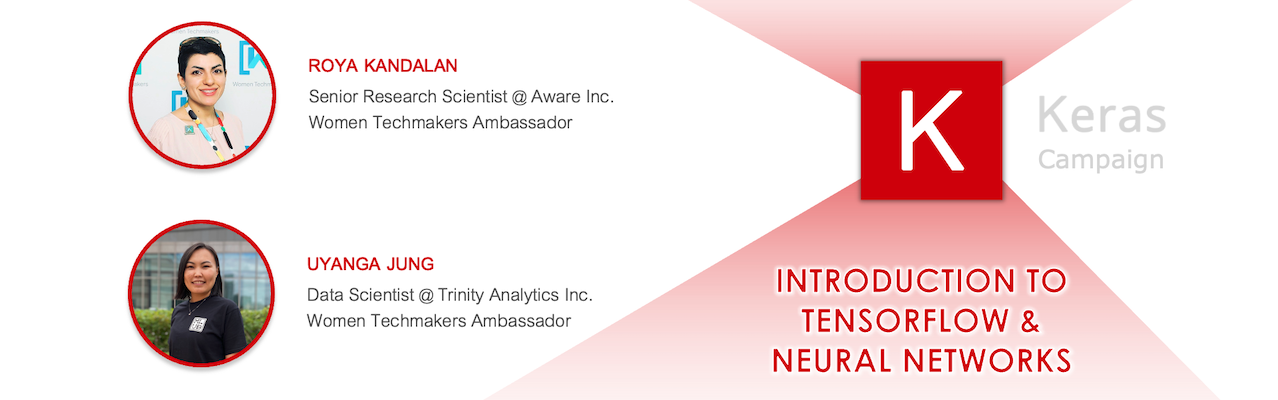

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.14.0


#Fashion MNIST Dataset, A Computer Vision Example
In the previous exercise, you learned how to create a neural network that could solve a problem by figuring things out on its own. It was like teaching the computer to do something it could have done more simply if we just told it the rules, like the math equation y=2x-1.

But what if we're dealing with something much trickier, like recognizing objects in pictures (imagine trying to teach a computer to tell shoes from hats)? In those cases, it's way more challenging to write out the rules, so that's where machine learning and neural networks really shine. Now, we'll dive into an example where we'll build a neural network to identify different types of clothing, and we'll train it using a dataset with 10 different clothing categories.

The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label.



0.   T-Shirt/ Top
1.   Trouser
2.   Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




This dataset is available [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

When you use the load_data() function with this object, you'll receive two sets of data in the form of two tuples, each containing two lists. These data sets will comprise the training and testing information for images containing various clothing items along with their corresponding labels.

In [4]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


If you open and image, you'll see that the numbers are all between 0 and 255. When you're teaching a neural network, especially for pictures, it often learns better if you change these numbers to be between 0 and 1. We call this "normalization," and the good news is, in Python, you can do it easily without any complicated loops. Here's how:

In [5]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now, let's shape the model and start training!

In [6]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=15)


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4996 - accuracy: 0.8241
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3789 - accuracy: 0.8639
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8774
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3124 - accuracy: 0.8843
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2819 - accuracy: 0.8956
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9003
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9039
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2484 - accuracy: 0.9073
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [13]:
# Get the last epoch training accuracy.
last_epoch_training_accuracy = history.history['accuracy'][-1]

# Assign the last epoch training accuracy to a text variable.
text = 'The last epoch training accuracy is {}%.'.format(int(last_epoch_training_accuracy * 100))

# Insert the text variable into the text cell.
display(Markdown(text))

The last epoch training accuracy is 92%.


Once the training is complete, you'll see an accuracy value at the end of the final training epoch, which might look like last_epoch_training_accuracy. This indicates that your neural network can classify the training data with about 91% accuracy, meaning it correctly predicts the labels in 91% of cases. This performance, while not excellent, is reasonable considering the short training time of 5 epochs.

Now, the real test is how well it performs on new, unseen data. To assess this, we use the test images and labels. By calling model.evaluate() with this test dataset, you can determine the model's loss and accuracy on unseen data, providing insights into its real-world performance. Let's give it a try to see how well it does!

In [14]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3400 - accuracy: 0.8819


[0.3400478661060333, 0.8819000124931335]

In adddition, plotting loss and accuracy during the training of machine learning models provides crucial insights into the performance and convergence of the model. The loss plot offers a visual representation of how well the model's predictions align with the actual outcomes, typically decreasing as the model learns, whereas the accuracy plot showcases the proportion of correct predictions the model makes over time. Monitoring these metrics helps in identifying overfitting, underfitting, and ensuring that the model generalizes well to new, unseen data. By visualizing these trends, researchers and practitioners can make informed decisions on when to stop training, whether to adjust hyperparameters, or if changes to the model architecture are needed.

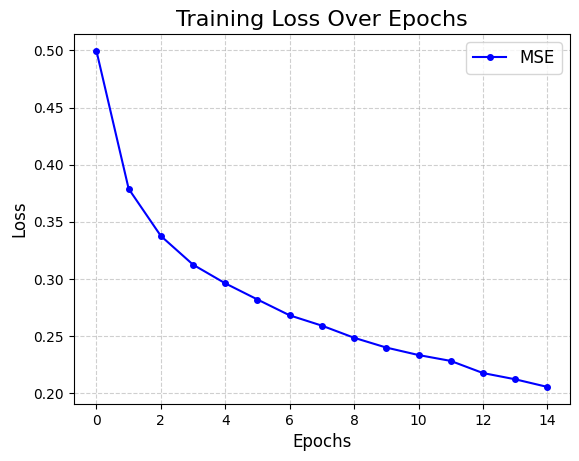

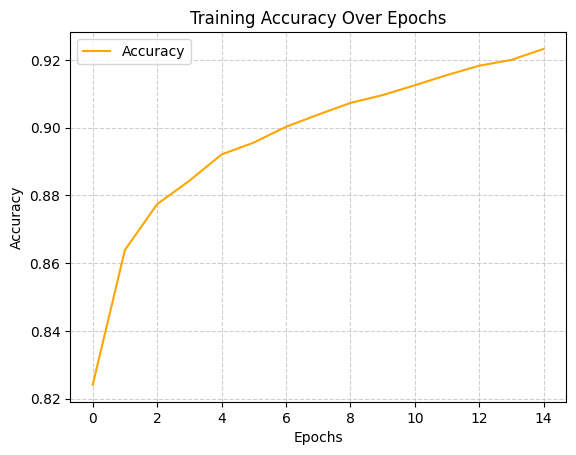

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']

# Create the plot
plt.plot(loss, color='blue', linestyle='-', marker='o', markersize=4, label='MSE')

# Customize the plot
plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.figure()
accuracy = history.history['accuracy']

# Create the plot
plt.plot(accuracy, color='orange', label='Accuracy')

# Customize the plot
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)

## Using Callbacks to Control Training

To create a callback, you start by defining a class that inherits from the `tf.keras.callbacks.Callback` base class. Inside this class, you can specify various methods to determine when and where the callback actions should occur. In the example below, we utilize the `on_epoch_end()` method to inspect the loss at the conclusion of each training epoch.

In [18]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.17

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.17):

      # Stop if threshold is met
      print("\nLoss is lower than 0.17 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

Since we've already defined and compiled the model, the next step is to declare our callbacks and include them as input to the `model.fit` function. Once this is done, we can initiate the training process.

In [20]:
# Train the model with a callback
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1761 - accuracy: 0.9340
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1705 - accuracy: 0.9362
Epoch 3/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.1676 - accuracy: 0.9379
Loss is lower than 0.17 so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1676 - accuracy: 0.9379


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now the question is, if we can imporve this performace?

# What is Convolution?

In the model mentioned earlier, you can expect an accuracy of roughly 89% for training and 87% for validation. Not too shabby. However, if you're aiming to enhance it, consider employing convolutions. While we won't delve deep into convolutions here (refer to the classroom resources for more), the essential idea is that they refine the image's content, emphasizing certain features, which can potentially enhance model precision.

If you've ever manipulated images using filters, then the idea of convolutions will seem familiar. In essence, you employ a matrix (often 3x3 or 5x5) and slide it over the image's entirety. Adjusting the base pixels according to the matrix's formula lets you achieve effects such as edge detection. For instance, using the link mentioned, there's a 3x3 matrix tailored for edge detection, with the center cell valued at 8 and its surrounding ones at -1. Here, each pixel's value is multiplied by 8, then decreased by its neighbors' values. Applying this to every pixel produces an image with emphasized edges.

This technique is invaluable in computer vision since it accentuates distinguishing features. Additionally, training becomes efficient since the model focuses only on these emphasized features.

This leads us to Convolutional Neural Networks (CNNs). Introduce convolutional layers before the dense layers, and the data fed to the dense layers becomes more refined and potentially more accurate.

Before diving into a CNN, take a closer look on a kernal.

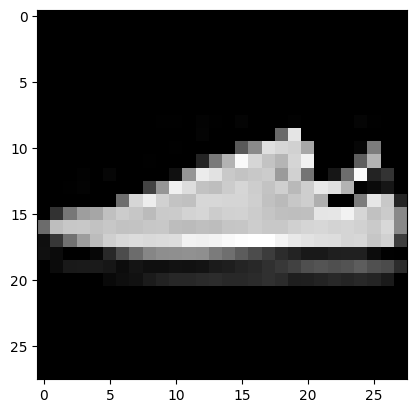

In [22]:

import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 6

image = training_images[index]
# Visualize the image
plt.imshow(image, cmap = 'gray')

In [23]:
import numpy as np

def apply_kernel(image, kernel, padding = True):
  """Applies the given kernel to the given image.

  Args:
    image: A numpy array representing the input image.
    kernel: A numpy array representing the kernel.

  Returns:
    A numpy array representing the output image.
  """

  print(image.shape)
  # Pad the image if necessary.
  if padding:
    image = np.pad(image, [(1 , 1),
                                  (1 ,1)],
                            mode='constant')

  # Iterate over the image and apply the kernel to each pixel.
  output_image = np.zeros(image.shape)

  for i in range(image.shape[0]-kernel.shape[0] ):
    for j in range(image.shape[1]-kernel.shape[1] ):
      patch = image[i:i + kernel.shape[0], j:j + kernel.shape[1]]

      output_image[i, j] = np.sum(patch * kernel)


  return image, output_image

(28, 28)


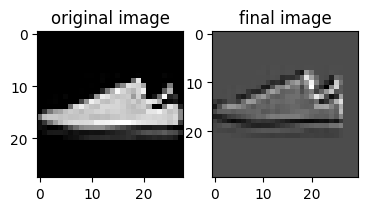

In [24]:
kernel = np.array([[-1,  0,   -2],
                   [0.5, 4.5, -1.5],
                   [1.5, 2,   -3]])

# Apply the kernel to the image.
padding = True
padded_image, output_image = apply_kernel(image, kernel, padding)

plt.subplot(1,3,1)
# Visualize the image
plt.imshow(image, cmap = 'gray')
plt.title("original image")

# Print the output image.

plt.subplot(1,3,2)
plt.title("final image")
plt.imshow(output_image, cmap = 'gray')

Now try different kernels, what about

```
# kernel = np.array([[-1, 0, 1],
#                    [-2, 0, 2],
#                    [-1, 0, 1]])

# kernel = np.array([[-1, -2, -1],
#                    [0,  0, 0],
#                    [1, 2, 1]])
```



# Implementing a Convolution Network

Now, execute the following code. It's analogous to the previous neural network but incorporates Convolution and MaxPooling layers at the beginning. It might consume more time, but notice the difference in accuracy.

In [25]:
# Define the model
model = tf.keras.models.Sequential([

  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


In [26]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [27]:
# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4605 - accuracy: 0.8315
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3098 - accuracy: 0.8870
Epoch 3/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2643 - accuracy: 0.9027
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2358 - accuracy: 0.9117
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2115 - accuracy: 0.9205

MODEL EVALUATION:
313/313 [==============================] - 2s 6ms/step - loss: 0.2683 - accuracy: 0.9028


## Visualizing the Convolutions and Pooling

So, we want to see how our image changes after we use something called "convolutions". Imagine using a special magnifying glass that focuses on specific patterns in an image. In the next exercise, we're going to look at the first 100 images we've tested.

Now, notice the pictures at the 1st, 24th, and 29th spots? They're all showing shoes. We'll use our special "magnifying glass" (convolution) on these shoe images. When we do this, you'll see they have similar patterns or features. This helps our computer program recognize shoes better and faster!

Think of it as giving hints to our program about what makes a shoe, a shoe! Cool, right? Let's dive in!

In [28]:
print(test_labels[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 31ms/step


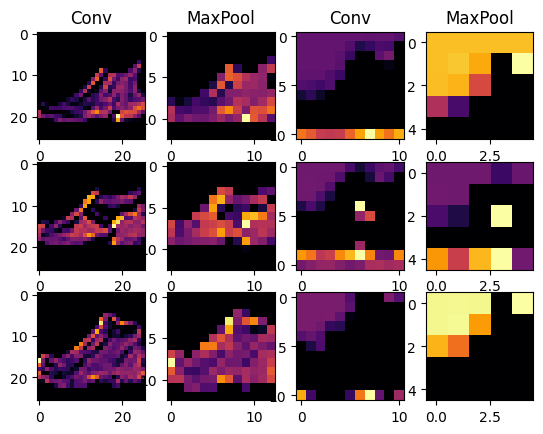

In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].set_title("MaxPool" if "MaxPool" in layer_outputs[x].name else "Conv" if "conv" in layer_outputs[x].name else None)
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Training with ImageDataGenerator

In this session, we'll be constructing and training a model using the "Cats and Dogs " dataset. To process and feed this dataset to a convolutional neural network, we'll leverage the capabilities of the ImageDataGenerator class.

Important: This workbook is tailored for execution on Google Colab. Attempting to run it on a local environment could lead to potential issues or errors.

Proceed by executing the following code to retrieve the dataset, which is packaged in a ZIP file named cats_and_dogs_filtered.zip.

In [5]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-10-27 01:34:29--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.207, 142.251.111.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   141MB/s    in 0.5s    

2023-10-27 01:34:29 (141 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



You can then unzip the archive using the zipfile module.

In [6]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()



The .zip file unpacks into a main directory named .cats_and_dogs_filtered. Inside, you'll find two subfolders: one for cats and another for dogs.


A notable aspect here: We don't tag the images as 'cats' or 'dogs' ourselves. Instead, we'll leverage the ImageDataGenerator tool. It's designed to auto-label images based on their folder arrangement. So, if you have a primary 'training' folder with two subfolders named 'cats' and 'dogs', the ImageDataGenerator handles the labeling, which means less coding for us. Same applies for the validation data.

Next, let's specify these directory paths:

In [7]:
# Assign training and validation set directories
base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Now see what the filenames look like in the cats and dogs training directories:



In [9]:
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:10])

['cat.505.jpg', 'cat.540.jpg', 'cat.516.jpg', 'cat.845.jpg', 'cat.748.jpg', 'cat.464.jpg', 'cat.19.jpg', 'cat.873.jpg', 'cat.549.jpg', 'cat.89.jpg']
['dog.851.jpg', 'dog.199.jpg', 'dog.641.jpg', 'dog.109.jpg', 'dog.573.jpg', 'dog.410.jpg', 'dog.174.jpg', 'dog.12.jpg', 'dog.468.jpg', 'dog.291.jpg']


You can also find out the total number of cats and dogs images in the directories:



In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training cat images: 1000
total training dog images: 1000


Now take a look at a few pictures to get a better sense of what they look like. First, configure the matplotlib parameters:



In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cats and 8 dogs pictures. You can rerun the cell to see a fresh batch each time:



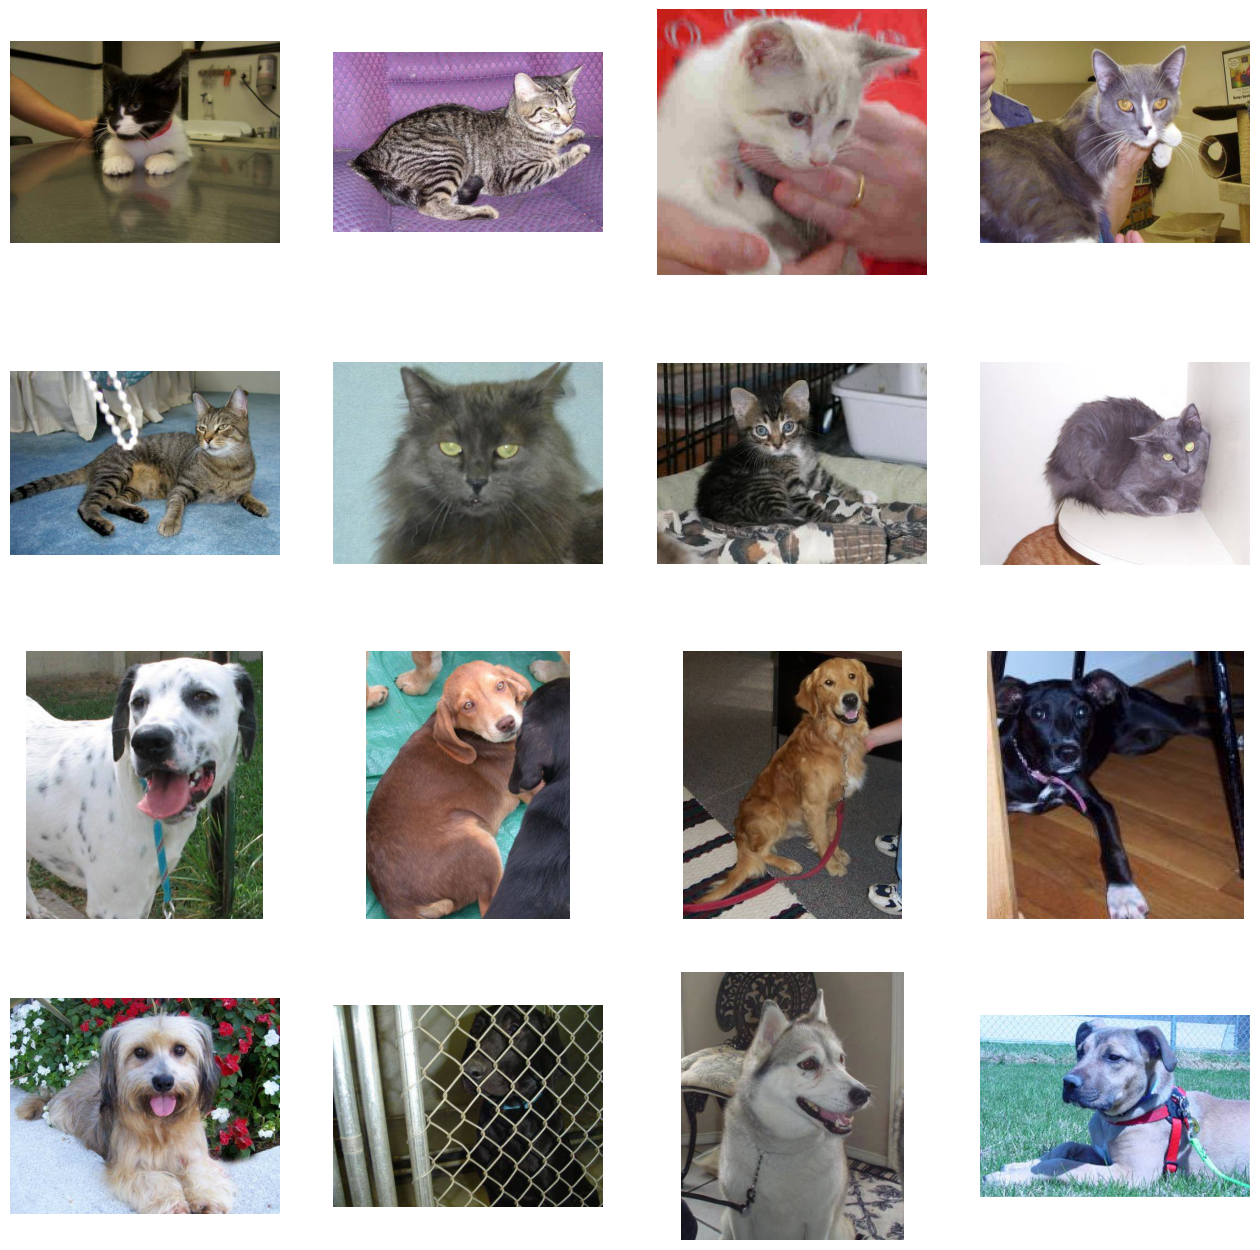

In [9]:
#  Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Model from Scratch
Next, we'll include the convolutional layers just like we did before and then flatten the outcome so it can be input into the dense layers. Remember, since we're differentiating between two classes (it's a binary classification), we'll wrap up our network with a sigmoid activation. This means the network's output will be a number between 0 and 1, representing the likelihood that the image belongs to class 1 (as opposed to class 0).

In [10]:
from tensorflow.keras.optimizers import Adam
def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

  return model

You can review the network architecture and the output shapes with model.summary().



In [11]:
# Create a new model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

The "output shape" column indicates the changes in the size of your feature map through each layer. As we discussed before, convolution layers tend to shrink the image by removing the outermost pixels, while each pooling layer reduces the dimensions by half.

Next, let's set up the criteria for training the model. Since we're dealing with a binary classification, we'll train the model using the binary_crossentropy loss, and our final activation will be a sigmoid.The adam optimizer will be used with a learning rate set at 0.001. During the training process, it's essential to keep an eye on classification accuracy.

Our next task is to prepare data generators. These will read images from our source folders, turn them into float32 tensors, and supply them, along with their labels, to the model. We'll use one generator for training images and another for validation. They will produce batches of images with a size of 300x300 along with their binary labels.

It's common knowledge that before feeding data into neural networks, we should tweak or normalize it. This ensures that the network processes the data more efficiently. Rather than using raw pixels, we'll adjust the images so that pixel values lie between 0 and 1 (initially, they are between 0 and 255).

In Keras, we achieve this using the keras.preprocessing.image.ImageDataGenerator class and its `'rescale'` parameter. This class lets you create instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Training
We can start training for 15 epochs.

Please pay attention to the values for each epoch.

'Loss' and 'accuracy' are vital metrics that reflect the progress of training. While 'loss' evaluates how closely the model's predictions align with the actual labels, 'accuracy' measures the percentage of predictions the model gets right.

In [15]:
# Constant for epochs
EPOCHS = 20

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 111s - loss: 0.7006 - accuracy: 0.5065 - val_loss: 0.6914 - val_accuracy: 0.5000 - 111s/epoch - 1s/step
Epoch 2/20
100/100 - 103s - loss: 0.6865 - accuracy: 0.5365 - val_loss: 0.6507 - val_accuracy: 0.5840 - 103s/epoch - 1s/step
Epoch 3/20
100/100 - 101s - loss: 0.6810 - accuracy: 0.5280 - val_loss: 0.6675 - val_accuracy: 0.6050 - 101s/epoch - 1s/step
Epoch 4/20
100/100 - 109s - loss: 0.6430 - accuracy: 0.6280 - val_loss: 0.6168 - val_accuracy: 0.6480 - 109s/epoch - 1s/step
Epoch 5/20
100/100 - 108s - loss: 0.5923 - accuracy: 0.6775 - val_loss: 0.6179 - val_accuracy: 0.6530 - 108s/epoch - 1s/step
Epoch 6/20
100/100 - 105s - loss: 0.5813 - accuracy: 0.6860 - val_loss: 0.6110 - val_accuracy: 0.6870 - 105s/epoch - 1s/step
Epoch 7/20
100/100 - 108s - loss: 0.5360 - accuracy: 0.7300 - val_loss: 0.6087 - val_accuracy: 0.6820 - 108s/epoch - 1s/step
Epoch 8/20
100/100 - 107s - loss: 0.5094 - accuracy: 0.7410 - val_loss: 0.6195 - val_accuracy: 0.6670 - 107s/epoch - 1s/step


In [12]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

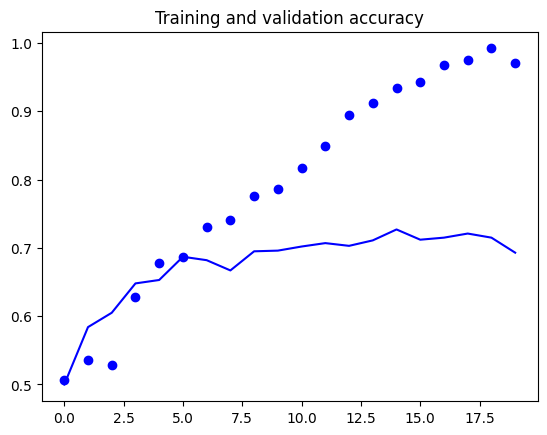

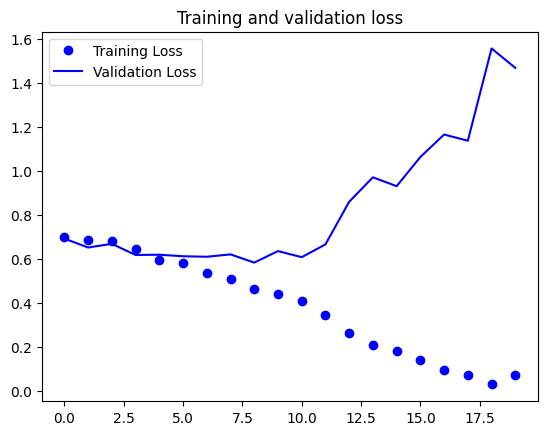

In [17]:
# Plot training results
plot_loss_acc(history)

#Implementing image augmentation
To combat overfitting, image augmentation can be employed. Consider the typical images of a cat: ears on top, followed by eyes, and then the mouth, with consistent distances like the one between the eyes and ears.

Imagine slightly modifying these images by rotating or compressing them. This concept is what image augmentation encompasses, and there's a straightforward API to assist with it!

Examine the ImageDataGenerator you've used for image rescaling. It also has other attributes that facilitate image augmentation.



```
train_datagen = ImageDataGenerator(
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

```



These represent just a handful of available configurations. Here's a brief overview:

`rotation_range` denotes the possible rotation angle (from 0–180) for random rotations.

`width_shift` and `height_shift` define the proportion of width or height for random vertical or horizontal shifts.

`shear_range` is utilized for random shearing operations.

`zoom_range` specifies the random zoom factor.

`horizontal_flip` allows for random horizontal flips of images. It's useful when horizontal symmetry is expected (like in real-world photos).

`fill_mode` dictates how new pixels, formed due to rotation or shifts, are filled.

Execute the subsequent cells to gauge its effects. While the code mirrors the original, train_datagen has been adjusted to incorporate the above parameters.

In [14]:
# Constant for epochs
EPOCHS = 20

# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 120s - loss: 0.6953 - accuracy: 0.5055 - val_loss: 0.6932 - val_accuracy: 0.5000 - 120s/epoch - 1s/step
Epoch 2/20
100/100 - 122s - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000 - 122s/epoch - 1s/step
Epoch 3/20
100/100 - 113s - loss: 0.6919 - accuracy: 0.5010 - val_loss: 0.6861 - val_accuracy: 0.4990 - 113s/epoch - 1s/step
Epoch 4/20
100/100 - 110s - loss: 0.6904 - accuracy: 0.5045 - val_loss: 0.6934 - val_accuracy: 0.5000 - 110s/epoch - 1s/step
Epoch 5/20
100/100 - 111s - loss: 0.6897 - accuracy: 0.5310 - val_loss: 0.7014 - val_accuracy: 0.5660 - 111s/epoch - 1s/step
Epoch 6/20
100/100 - 101s - loss: 0.6874 - accuracy: 0.5235 - val_loss: 0.6912 - val_accuracy: 0.5060 - 101s/epoch - 1s/step
Epoch 7/20
100/100 - 111s - loss: 0.6904 - accuracy: 0.5260 - val_loss: 0.6960 - val_accuracy: 0.5040 - 111s/epoch - 1s/step
Epoch 8/20
100/100 - 111s - loss: 0.6901 

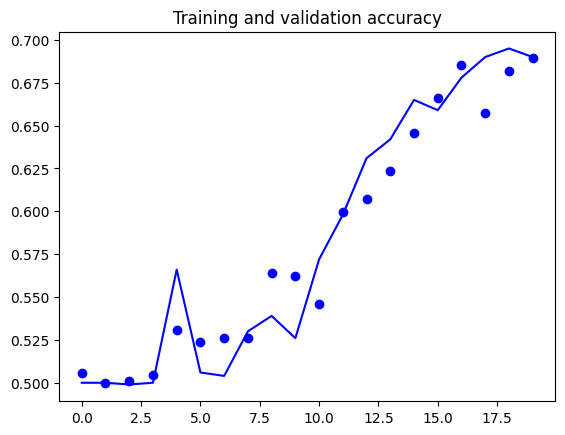

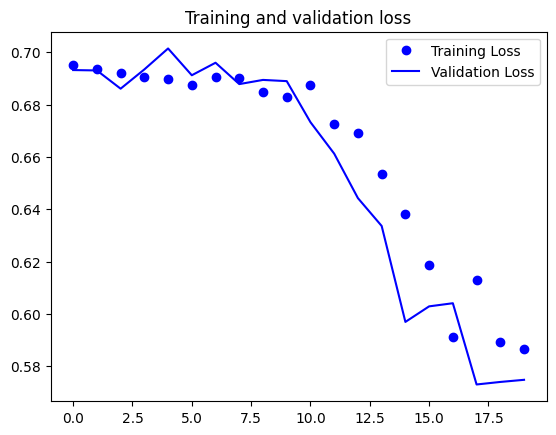

In [15]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)


The training accuracy dropped compared to our first model because we added variety to the images. But the good news is the validation accuracy is getting better, meaning our model is doing a better job with new data.

To sum it up:
We learned a way to stop the model from overfitting. By changing up our images a bit using ImageDataGenerator, we can get better results. Play around with the settings in train_datagen to see different outcomes.

## Dropout

The provided code defines a deep learning model using TensorFlow's Keras API, tailored for image data. It comprises several layers, primarily convolutional layers (Conv2D) and max-pooling layers (MaxPooling2D), which help the model detect patterns and features in images. As we delve deeper into the network, the number of filters in convolutional layers increases, capturing more complex patterns. After the convolutional layers, the model has a Flatten layer to reshape the 3D outputs into a 1D vector, which is then passed through two dense layers (Dense). The Dropout layer is noteworthy; it's introduced before the final dense layer and drops out (sets to zero) a fraction (20% in this case) of input units during training. This "dropout" technique is a form of regularization. By periodically omitting certain neurons, it ensures that no single neuron becomes overly specialized or overly dependent on other specific neurons, thus aiding in preventing overfitting. The final dense layer uses a sigmoid activation function, making this model suitable for multiclass classification tasks.

In [19]:
def create_model_drop_out():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

  return model

In [20]:
# Create new model
model_for_do = create_model()
# Train the new model
history_with_do  = model_for_do.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 110s - loss: 0.6988 - accuracy: 0.4980 - val_loss: 0.6935 - val_accuracy: 0.5000 - 110s/epoch - 1s/step
Epoch 2/20
100/100 - 107s - loss: 0.6934 - accuracy: 0.5080 - val_loss: 0.6976 - val_accuracy: 0.5000 - 107s/epoch - 1s/step
Epoch 3/20
100/100 - 106s - loss: 0.6931 - accuracy: 0.5220 - val_loss: 0.6909 - val_accuracy: 0.5280 - 106s/epoch - 1s/step
Epoch 4/20
100/100 - 113s - loss: 0.6928 - accuracy: 0.5185 - val_loss: 0.6916 - val_accuracy: 0.5290 - 113s/epoch - 1s/step
Epoch 5/20
100/100 - 103s - loss: 0.6935 - accuracy: 0.4900 - val_loss: 0.6926 - val_accuracy: 0.5040 - 103s/epoch - 1s/step
Epoch 6/20
100/100 - 105s - loss: 0.6905 - accuracy: 0.5350 - val_loss: 0.6921 - val_accuracy: 0.5080 - 105s/epoch - 1s/step
Epoch 7/20
100/100 - 112s - loss: 0.6886 - accuracy: 0.5420 - val_loss: 0.6815 - val_accuracy: 0.5550 - 112s/epoch - 1s/step
Epoch 8/20
100/100 - 107s - loss: 0.6941 - accuracy: 0.5095 - val_loss: 0.6932 - val_accuracy: 0.5020 - 107s/epoch - 1s/step
